In [42]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [43]:
iris=datasets.load_iris()
# Petal Length(花びらの長さ), Petal Width(花びらの幅)の取得
X=iris.data[:,[2,3]]
# クラスラベルの取得
y=iris.target
# データセットの分割
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [44]:
X_min,X_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

# meshgrid関数で、2つの配列を作る
x_axis,y_axis=np.meshgrid(np.arange(X_min,X_max,0.02),
                         np.arange(y_min,y_max,0.02))

print(x_axis.shape)
print(y_axis.shape)

# x_axisとy_axisの要素を1行にまとめるために組み合わせの数を計算
data_num=x_axis.shape[0]*x_axis.shape[1]
print(data_num)

# 2つの1次元配列を組み合わせて2次元配列を作成
grid_points=np.concatenate((x_axis.reshape(data_num,1),y_axis.reshape(data_num,1)),axis=1)
print(grid_points.shape)

(220, 395)
(220, 395)
86900
(86900, 2)


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# 深さを「3」
tree=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)

In [47]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [48]:
#予測
pred_label=tree.predict(grid_points)

print(pred_label.shape)

(86900,)


In [49]:
pred_label=pred_label.reshape(x_axis.shape)
print(pred_label.shape)

(220, 395)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Petal Width')

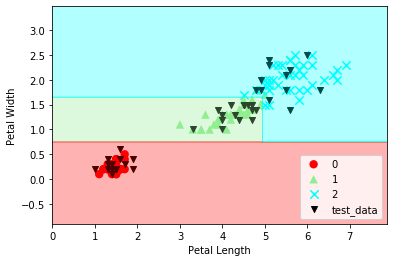

In [50]:
#グラフ化
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

markers=("o",'^','x')
colors=('red','lightgreen','cyan')
cmap=ListedColormap(colors)

for i,n in enumerate(np.unique(y)):
    plt.scatter(x=X_train[y_train==n,0],
               y=X_train[y_train==n,1],
               c=cmap(i),
               marker=markers[i],
               s=70,
               edgecolors='',
               label=n)
    
#テストデータグラフ化
plt.scatter(X_test[:,0],
           X_test[:,1],
           c="k",
           marker='v',
           label="test_data")
#最大値、最小値の場所をグラフ化
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())

#領域塗りつぶし
plt.contourf(x_axis,y_axis,pred_label,alpha=0.3,cmap=cmap)

plt.legend(loc='lower right')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [55]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",
               feature_names=["Petal length","petal width"])
!dot -T png tree.dot -o tree.png


In [56]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [57]:
iris=datasets.load_iris()
# Petal Length(花びらの長さ), Petal Width(花びらの幅)の取得
X=iris.data[:,[2,3]]
# クラスラベルの取得
y=iris.target
# データセットの分割
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [58]:
X_min,X_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

# meshgrid関数で、2つの配列を作る
x_axis,y_axis=np.meshgrid(np.arange(X_min,X_max,0.02),
                         np.arange(y_min,y_max,0.02))

print(x_axis.shape)
print(y_axis.shape)

# x_axisとy_axisの要素を1行にまとめるために組み合わせの数を計算
data_num=x_axis.shape[0]*x_axis.shape[1]
print(data_num)

# 2つの1次元配列を組み合わせて2次元配列を作成
grid_points=np.concatenate((x_axis.reshape(data_num,1),y_axis.reshape(data_num,1)),axis=1)
print(grid_points.shape)

(220, 395)
(220, 395)
86900
(86900, 2)


In [59]:
from sklearn.tree import DecisionTreeClassifier
#ランダムフォレスﾄ実装
from sklearn.ensemble import RandomForestClassifier

In [60]:
# 深さを「3」
tree=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
#インスタンス作成
forest=RandomForestClassifier(n_estimators=10,random_state=1)

In [61]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [62]:
pred_label=forest.predict(grid_points)
print(pred_label.shape)

(86900,)


In [63]:
pred_label=pred_label.reshape(x_axis.shape)
print(pred_label.shape)

(220, 395)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Petal Width')

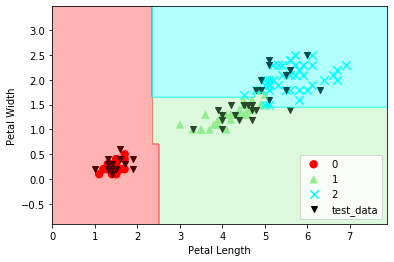

In [64]:
#グラフ化
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

markers=("o",'^','x')
colors=('red','lightgreen','cyan')
cmap=ListedColormap(colors)

for i,n in enumerate(np.unique(y)):
    plt.scatter(x=X_train[y_train==n,0],
               y=X_train[y_train==n,1],
               c=cmap(i),
               marker=markers[i],
               s=70,
               edgecolors='',
               label=n)
    
#テストデータグラフ化
plt.scatter(X_test[:,0],
           X_test[:,1],
           c="k",
           marker='v',
           label="test_data")
#最大値、最小値の場所をグラフ化
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())

#領域塗りつぶし
plt.contourf(x_axis,y_axis,pred_label,alpha=0.3,cmap=cmap)

plt.legend(loc='lower right')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')